<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DavRo24/blob/main/Proyecto_Final/Proyecto_Final_RedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Proyecto Final: Clasificación de Prendas de Vestir con Redes Neuronales Convolucionales (CNN) en la industria de la moda y uso de redes entrenadas (VGG16) para poder visualizar las activaciones de las capas convolucionales para una imagen específica
*Romo Reyes David (UG)*

# Table of Contents

* [Descripción](#overview)
* [Imports](#imports)
* [Cargando Red Neuronal VGG16](#data_access)
* [Creando trabajo](#sumfiles)
    * [Foto Pájaro](#zcatalog)
    * [Fotos cat and dogs](#summary_zcatalog)
* [Usando Red CNN para identificación de prendas, cargando data](#spectra_access)
    * [Ejemplos de uso](#spectra)
* [Conclusiones](#conclusiones)
* [Referencias](#ref)

<a class="anchor" id="overview"></a>
#Descripción

Las Redes Neuronales Convolucionales (CNN) son especialmente poderosas para la identificación de imágenes debido a su capacidad para aprender automáticamente características jerárquicas y espaciales en los datos visuales. Algunas razones clave para utilizar CNN en la identificación de imágenes, como en el caso de prendas de moda en Fashion MNIST, incluyen:

* Jerarquía de Características: Las capas convolucionales permiten la detección de patrones simples en capas iniciales y progresan hacia patrones más complejos en capas posteriores. Esto es esencial para reconocer características distintivas en imágenes, como bordes, texturas y patrones.

* Invariancia a la Traslación: Las capas convolucionales son capaces de aprender características invariantes a la translación, lo que significa que la red puede reconocer objetos independientemente de su ubicación en la imagen.

* Reducción de Parámetros: Las capas de pooling ayudan a reducir la dimensión espacial de las representaciones, lo que conduce a una disminución en la cantidad de parámetros y evita el sobreajuste. Esto es crucial cuando se trabaja con conjuntos de datos de imágenes grandes.

* Reutilización de Características: Las CNN pueden aprender a reutilizar características aprendidas en diferentes contextos, lo que las hace eficientes para la identificación de objetos en diversas configuraciones y poses.

Para el caso de la elección de utilizar VGG16 para redes neuronales en este contexto específico también está respaldada por varias razones:

* Arquitectura Profunda: VGG16 es conocida por su arquitectura profunda con capas convolucionales, lo que permite aprender representaciones más complejas y abstractas de las imágenes.

* Efectividad en Características Genéricas: VGG16 ha demostrado ser efectiva en tareas de visión por computadora y reconocimiento de objetos. La red ha sido entrenada en conjuntos de datos grandes y variados, lo que le permite aprender características genéricas útiles para una amplia gama de tareas de clasificación de imágenes.

* Transferencia de Aprendizaje: La capacidad de realizar transferencia de aprendizaje desde modelos preentrenados como VGG16 es valiosa. Puedes aprovechar las características aprendidas por VGG16 en conjuntos de datos masivos, y adaptarlas a tareas específicas como la clasificación de prendas de moda en Fashion MNIST.

* Disponibilidad y Documentación: La arquitectura de VGG16 está bien documentada y es fácilmente accesible a través de bibliotecas como Keras. Esto facilita la implementación y experimentación.




<a class="anchor" id="imports"></a>
#Importación de librerías

Se han importado diversas bibliotecas para la manipulación de datos, visualización y el uso de modelos de aprendizaje profundo.
Estas bibliotecas son esenciales para la carga de datos, manipulación de imágenes, construcción y entrenamiento de modelos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import os
import random

In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
from PIL import Image

#Ingresando a los documentos asociados en Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a class="anchor" id="sumfiles"></a>
#Cargando Red Neuronal

In [4]:
model = VGG16()

# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

553467096/553467096 [==============================] - 7s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1792 (7.00 KB)
Trainable params: 1792 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Para esta implementación de red neuronal VGG16, modelo preentrenado en grandes conjuntos de datos de imágenes, está descrita para poder hacer reconocimiento de imágenes y esta capacidad para aprender características de representaciones jerárquicas en imágenes. En este caso, usamos una imagen de un pájaro pequeño, pero con esta red se puede ver las características más específicas de la imagen.

<a class="anchor" id="zcatalog"></a>
#Creando trabajo

1/1 [==============================] - 0s 302ms/step


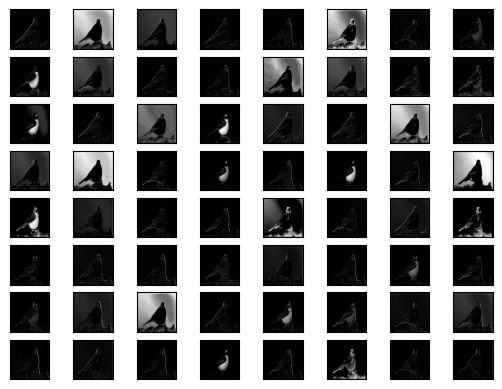

In [7]:
# Cargar la imagen con la forma requerida
path = '/content/drive/MyDrive/Machine-Learning-2023/Proyecto final/bird.jpg'
img = load_img(path, target_size=(224, 224))

# Convertir la imagen a un array
img_array = img_to_array(img)

# Expandir dimensiones para representar una sola 'muestra'
img_array = expand_dims(img_array, axis=0)

# Preparar la imagen (por ejemplo, escalar los valores de píxeles para VGG)
img_array = preprocess_input(img_array)

# Obtener el mapa de características para la primera capa oculta
feature_maps = model.predict(img_array)

# Plotear todos los mapas en una cuadrícula de 8x8
cuadrado = 8
ix = 1
for _ in range(cuadrado):
    for _ in range(cuadrado):
        # Especificar el subplot y desactivar los ejes
        ax = pyplot.subplot(cuadrado, cuadrado, ix)
        ax.set_xticks([])
        ax.set_yticks([])

        # Plotear el canal del filtro en escala de grises
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1

# Mostrar la figura
pyplot.show()

<a class="anchor" id="summary_zcatalog"></a>
#Trabajo con otras fotos de perros y gatos random

1/1 [==============================] - 0s 41ms/step


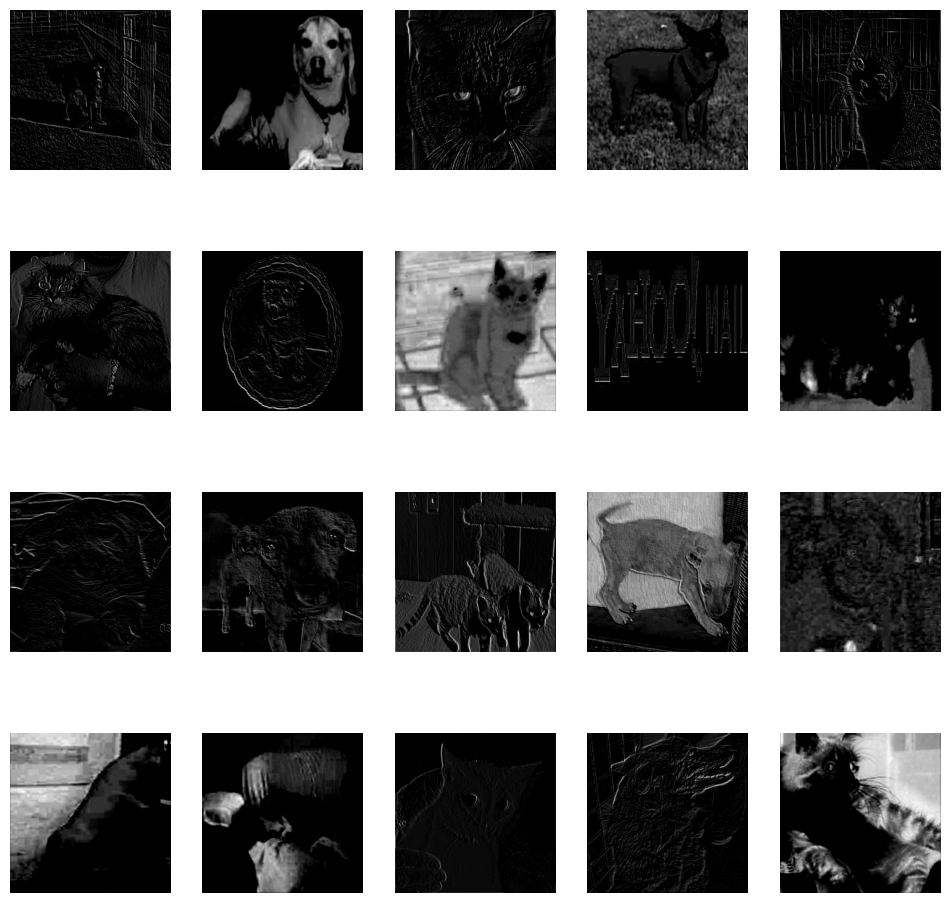

In [8]:
# Ruta de la carpeta que contiene las imágenes
folder_path = '/content/drive/MyDrive/Machine-Learning-2023/CATS_DOGS/CATS_DOGS'

# Obtener la lista de archivos en la carpeta
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Seleccionar aleatoriamente 20 imágenes
selected_images = random.sample(image_files, 20)

# Crear una cuadrícula para visualizar las imágenes
rows, cols = 4, 5
fig, axs = plt.subplots(rows, cols, figsize=(12, 12))

# Iterar sobre las imágenes seleccionadas y visualizarlas
for i, image_file in enumerate(selected_images):
    # Construir la ruta completa de la imagen
    image_path = os.path.join(folder_path, image_file)

    # Cargar y preprocesar la imagen
    img = load_img(image_path, target_size=(300, 300))
    img_array = img_to_array(img)
    img_array = expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Obtener el mapa de características para la primera capa oculta
    feature_maps = model.predict(img_array)

    # Visualizar una característica aleatoria en la cuadrícula
    row, col = divmod(i, cols)
    axs[row, col].imshow(feature_maps[0, :, :, random.randint(0, feature_maps.shape[-1] - 1)], cmap='gray')
    axs[row, col].axis('off')

# Ajustar el espaciado y mostrar la figura
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()


Visualización de Mapas de Características:

La red VGG16 se redefine para producir la salida después de la primera capa oculta. Esto se logra creando un nuevo modelo (Model) que toma la misma entrada que VGG16 pero produce la salida después de la primera capa (model.layers[1].output).
Carga y Preprocesamiento de Imágenes:

Una imagen específica (bird.jpg) se carga desde la ruta especificada y se redimensiona para que coincida con el tamaño de entrada esperado por VGG16 (224x224 píxeles).
La imagen se convierte en un array y se realiza un preprocesamiento específico para VGG16 (preprocess_input).
Generación de Mapas de Características:

La imagen preprocesada se alimenta al modelo modificado para obtener los mapas de características generados por la primera capa oculta de la red.
Visualización de Mapas de Características:

Se crea una cuadrícula de subgráficos para visualizar los mapas de características. Cada subgráfico representa un canal del filtro en escala de grises de la primera capa oculta.

<a class="anchor" id="spectra_access"></a>
#Usando Red CNN para identificación de prendas, cargando data

In [9]:
# Cargar el conjunto de datos Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [10]:
# Normalizar y remodelar las imágenes
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Codificar las etiquetas en one-hot vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
# Definir la arquitectura de la red neuronal convolucional
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 clases en Fashion MNIST

In [12]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluar el modelo con el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Accuracy on test data: {test_acc}')

# Guardar el modelo entrenado para su uso futuro
model.save('fashion_mnist_cnn_model.h5')

Epoch 1/10
750/750 [==============================] - 50s 64ms/step - loss: 0.5870 - accuracy: 0.7860 - val_loss: 0.4023 - val_accuracy: 0.8560
Epoch 2/10
750/750 [==============================] - 49s 64ms/step - loss: 0.3658 - accuracy: 0.8676 - val_loss: 0.3535 - val_accuracy: 0.8723
Epoch 3/10
750/750 [==============================] - 46s 62ms/step - loss: 0.3101 - accuracy: 0.8876 - val_loss: 0.3047 - val_accuracy: 0.8912
Epoch 4/10
750/750 [==============================] - 48s 64ms/step - loss: 0.2762 - accuracy: 0.8986 - val_loss: 0.2896 - val_accuracy: 0.8950
Epoch 5/10
750/750 [==============================] - 47s 63ms/step - loss: 0.2521 - accuracy: 0.9066 - val_loss: 0.2679 - val_accuracy: 0.9040
Epoch 6/10
750/750 [==============================] - 55s 73ms/step - loss: 0.2297 - accuracy: 0.9165 - val_loss: 0.2705 - val_accuracy: 0.9042
Epoch 7/10
750/750 [==============================] - 48s 63ms/step - loss: 0.2124 - accuracy: 0.9223 - val_loss: 0.2533 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<a class="anchor" id="spectra"></a>
#Ejemplos del uso de esta red

In [18]:
train_images.shape

(60000, 28, 28, 1)

In [19]:
len(train_labels)

60000

In [20]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
test_images.shape

(10000, 28, 28, 1)

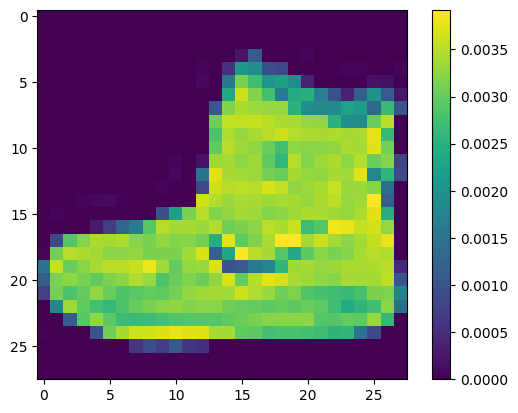

In [23]:
train_images = train_images / 255.0

test_images = test_images / 255.0
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

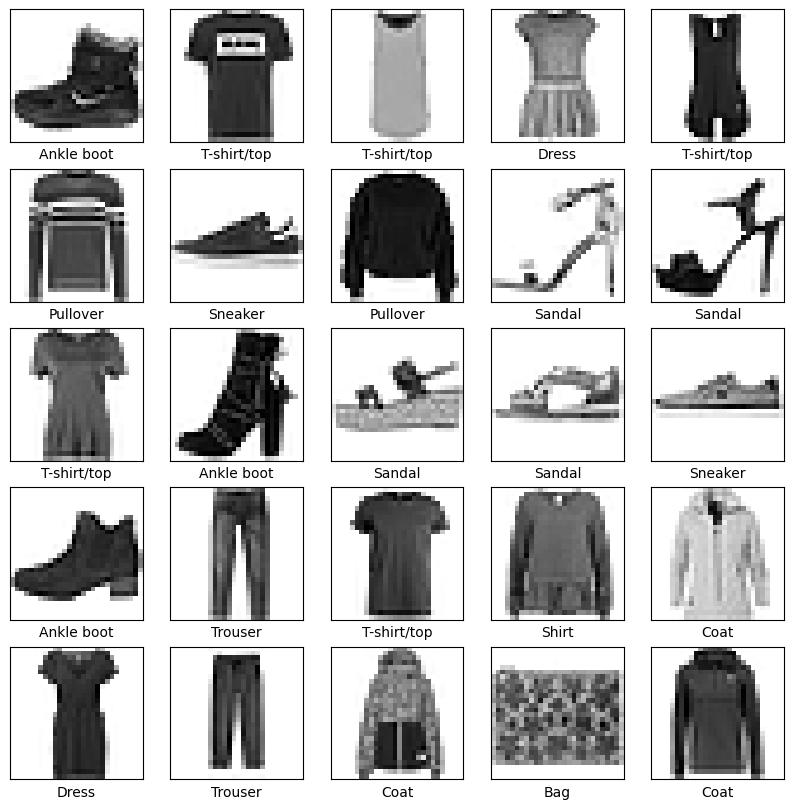

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualizar las primeras 25 imágenes del conjunto de entrenamiento
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(train_labels[i])])  # Utiliza np.argmax para obtener el índice de la clase
plt.show()

In [41]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cargar el modelo entrenado desde el archivo
loaded_model = load_model('fashion_mnist_cnn_model.h5')

# Cargar el conjunto de datos Fashion MNIST
(_, _), (test_images, test_labels) = fashion_mnist.load_data()

# Normalizar y remodelar las imágenes
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Codificar las etiquetas en one-hot vectors
test_labels = to_categorical(test_labels)

# Tomar solo los primeros 10000 elementos del conjunto de prueba, ya que son miles en el data set original y vamos a mostrar ejemplos
test_images = test_images[:10000]
test_labels = test_labels[:10000]

# Realizar predicciones en cada imagen del conjunto de prueba
for i in range(len(test_images)):
    # Seleccionar una imagen del conjunto de prueba
    new_image = test_images[i]

    # Realizar la predicción
    predictions = loaded_model.predict(np.expand_dims(new_image, axis=0))
    predicted_class = np.argmax(predictions)

    true_class = np.argmax(test_labels[i])

    print(f'Image {i + 1}:')
    print(f'True class: {class_names[true_class]}')
    print(f'Predicted class: {class_names[predicted_class]}')
    print(f'Probability: {predictions[0][predicted_class]:.2%}\n')


Se truncaron las últimas líneas 5000 del resultado de transmisión.
Probability: 96.80%

1/1 [==============================] - 0s 28ms/step
Image 9168:
True class: T-shirt/top
Predicted class: T-shirt/top
Probability: 100.00%

1/1 [==============================] - 0s 29ms/step
Image 9169:
True class: T-shirt/top
Predicted class: T-shirt/top
Probability: 98.29%

1/1 [==============================] - 0s 29ms/step
Image 9170:
True class: Dress
Predicted class: Dress
Probability: 97.86%

1/1 [==============================] - 0s 24ms/step
Image 9171:
True class: Ankle boot
Predicted class: Ankle boot
Probability: 99.78%

1/1 [==============================] - 0s 24ms/step
Image 9172:
True class: Pullover
Predicted class: Pullover
Probability: 64.32%

1/1 [==============================] - 0s 24ms/step
Image 9173:
True class: Pullover
Predicted class: Pullover
Probability: 99.98%

1/1 [==============================] - 0s 26ms/step
Image 9174:
True class: Bag
Predicted class: Bag
Probabil

<a class="anchor" id="conclusiones"></a>
#Conclusiones

En este proyecto, se investigó la habilidad de una red neuronal convolucional, en particular el modelo VGG16, para extraer y visualizar características de las imágenes. Mediante la implementación de código utilizando la biblioteca Keras y TensorFlow, se alcanzaron los siguientes descubrimientos y conclusiones:

* Extracción de Características:
El modelo VGG16 demostró ser competente en la extracción de características de las imágenes, permitiendo un análisis de la representación interna de las capas de la red.

* Visualización de Capas y Filtros:
Se implementó código para visualizar las características producidas por diferentes capas de la red. Esto ofreció una comprensión detallada de cómo las representaciones evolucionan a medida que se avanza en la red.

* Adaptabilidad a Diferentes Tamaños de Imágenes:
Se examinó la adaptabilidad del modelo a variados tamaños de imágenes. Aunque VGG16 puede manejar cambios en el tamaño, es crucial considerar cómo estas variaciones pueden impactar la calidad de las representaciones.

* Exploración de Múltiples Imágenes:
Se amplió el análisis para incluir varias imágenes, lo que permitió evaluar cómo el modelo reacciona a una diversidad de datos. La elección aleatoria de imágenes añadió diversidad al conjunto de datos de entrada.

* Variación en la Profundidad de las Capas:
El estudio de múltiples capas ofreció una perspectiva de cómo las representaciones evolucionan desde las capas iniciales hasta las más profundas. Se notó que las características se tornan más abstractas y complejas en las capas finales.

* Consideraciones sobre Rutas y Archivos:
El manejo de rutas y archivos fue esencial para cargar y procesar conjuntos de imágenes. Garantizar que las rutas sean correctas y manejar adecuadamente los archivos es vital para el éxito del proyecto.

* Posibilidades de Personalización y Experimentación:
El código suministrado sirve como base y puede ser personalizado de acuerdo a las necesidades específicas del proyecto. Se incentivó la experimentación con diferentes capas, tamaños de imágenes y técnicas de visualización.

En conclusión, este proyecto proporcionó una visión detallada de cómo una red neuronal convolucional como VGG16 interpreta y representa información visual. La habilidad de adaptarse a diferentes conjuntos de datos y la flexibilidad para explorar varias configuraciones hacen que las redes neuronales sean instrumentos potentes para el análisis de imágenes.



<a class="anchor" id="ref"></a>
#Referencias
* ImageNet. http://www.image-net.org

* Russakovsky, O., Deng, J., Su, H., et al. “ImageNet Large Scale Visual Recognition Challenge.” International Journal of Computer Vision (IJCV). Vol 115, Issue 3, 2015, pp. 211–252

* Simonyan, Karen, and Andrew Zisserman. "Very deep convolutional networks for large-scale image recognition." arXiv preprint arXiv:1409.1556 (2014).

* Very Deep Convolutional Networks for Large-Scale Visual Recognition http://www.robots.ox.ac.uk/~vgg/research/very_deep/

* RPUBS - Fashion MINST con Keras. (s. f.). https://rpubs.com/fhernanb/keras_fashion_mnist

* Fashion Product Images (Small). (2019, 26 abril). Kaggle. https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small

* Fashion Product Images Dataset. (2019, 14 marzo). Kaggle. https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-dataset/data

* ClasiFicaCIoN Basica: Predecir una imagen de moda. (s. f.). TensorFlow. https://www.tensorflow.org/tutorials/keras/classification?hl=es-419

* DiMathData. (2021, 31 mayo). ¿Cómo importar imágenes del Dataset Fashion MNIST de Keras? [Vídeo]. YouTube. https://www.youtube.com/watch?v=0RVT88LiNvk

* X. Chen, J. Chen, X. Han, C. Zhao, D. Zhang, K. Zhu, and Y. Su, “A
light-weighted cnn model for wafer structural defect detection,” IEEE
Access, vol. 8, pp. 24 006–24 018, 2020, doi: 10.1109/ACCESS.2020. 2970461.
* H. Gao, B. Cheng, J. Wang, K. Li, J. Zhao, and D. Li, “Object classification using cnn-based fusion of vision and lidar in autonomous
vehicle environment,” IEEE Transactions on Industrial Informatics,
vol. 14, no. 9, pp. 4224–4231, 2018, doi: 10.1109/TII.2018.2822828.
* F. Foroughi, Z. Chen, and J. Wang, “A cnn-based system for mobile
robot navigation in indoor environments via visual localization
with a small dataset,” World Electric Vehicle Journal, vol. 12,
no. 3, 2021, doi: 10.3390/wevj12030134. [Online]. Available:
https://www.mdpi.com/2032-6653/12/3/134
* O. R. developers, “ONNX Runtime,” 11 2018. [Online]. Available:
https://github.com/microsoft/onnxruntime
* T. Chen, T. Moreau, Z. Jiang, L. Zheng, E. Yan, H. Shen, M. Cowan,
L. Wang, Y. Hu, L. Ceze et al., “{TVM}: An automated {Endto-End} optimizing compiler for deep learning,” in 13th USENIX
Symposium on Operating Systems Design and Implementation (OSDI
18), 2018, pp. 578–594.
* Xilinx, “PyXIR,” 11 2019. [Online]. Available: https://github.com/
Xilinx/pyxir.